#Support Vector Regression

#Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset


In [2]:
data = pd.read_csv('car.csv')


# Preview the dataset (optional)


In [3]:
print(data.head())

   Year  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage  \
0  2010              72000          3             0           1    26.60   
1  2015              41000          2             0           1    19.67   
2  2012              85000          2             1           2    15.00   
3  2014             110000          2             0           1    13.50   
4  2016              58950          2             0           1    25.80   

   Engine   Power  Seats  Price  
0     998   58.16      5   1.75  
1    1582  126.20      5  12.50  
2    2179  115.00      5  17.50  
3    2477  175.56      7  15.00  
4    1498   98.60      5   5.40  


# Preprocess the data
# Handling categorical variables by converting them into dummy variables


In [4]:
data = pd.get_dummies(data, drop_first=True)

# Define features (X) and target (y)


In [5]:
X = data.drop('Price', axis=1)  # Replace 'Price' with the actual column name for the car price
y = data['Price']

# Split the dataset into training and testing sets


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize the features

In [7]:
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Standardize the target variable


In [8]:
# SVR performs better when the target variable is scaled as well
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test = y_test.values  # Keep original values for comparison later


# Initialize the Support Vector Regression model



In [9]:
model = SVR(kernel='rbf')

# Train the model

In [10]:
model.fit(X_train, y_train)

SVR()

# Evaluate the model

In [12]:
y_pred_scaled = model.predict(X_test)
y_pred_scaled_2d = y_pred_scaled.reshape(-1, 1)  # Reshape to 2D array
y_pred = scaler_y.inverse_transform(y_pred_scaled_2d).flatten()  # Inverse transform and flatten
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 27.71436231721846
R-squared: 0.8156042285059859


#Compare actual vs predicted prices


In [13]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())




   Actual  Predicted
0    1.90   3.795887
1    4.50   4.332096
2    4.75   4.747463
3   47.50  41.902238
4    2.90   4.493109


#EDA

# 1. Summary Statistics

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('car.csv')

print("Summary Statistics:\n", data.describe())


Summary Statistics:
               Year  Kilometers_Driven    Fuel_Type  Transmission   Owner_Type  \
count  4970.000000       4.970000e+03  4970.000000   4970.000000  4970.000000   
mean   2013.366600       5.904794e+04     1.554930      0.286117     1.200201   
std       3.239673       9.928827e+04     0.519591      0.451990     0.453026   
min    1998.000000       1.710000e+02     1.000000      0.000000     1.000000   
25%    2011.000000       3.400000e+04     1.000000      0.000000     1.000000   
50%    2014.000000       5.300000e+04     2.000000      0.000000     1.000000   
75%    2016.000000       7.300000e+04     2.000000      1.000000     1.000000   
max    2019.000000       6.500000e+06     3.000000      1.000000     4.000000   

           Mileage       Engine        Power        Seats        Price  
count  4970.000000  4970.000000  4970.000000  4970.000000  4970.000000  
mean     18.289789  1620.619718   115.507487     5.279276     9.426809  
std       4.148978   595.62153


# 2. Missing Values Analysis


In [16]:
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


# 3. Distribution of the Target Variable (Price)


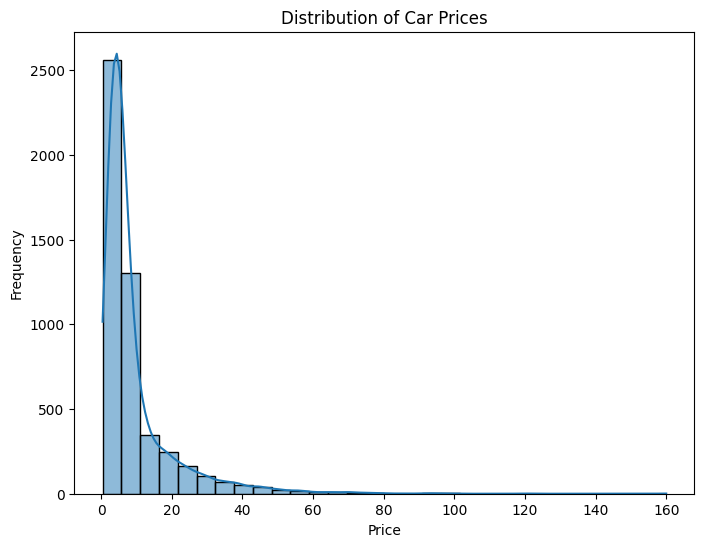

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Price'], kde=True, bins=30)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 4. Correlation Matrix (only numerical features)


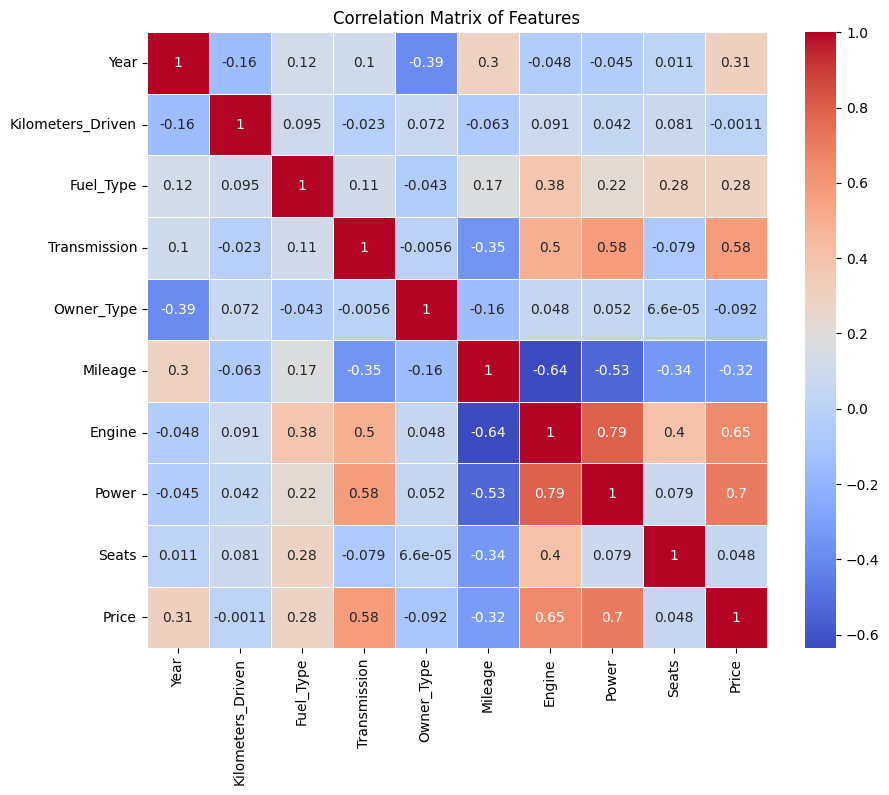

In [18]:
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# 5. Pair Plot (Numerical Features)


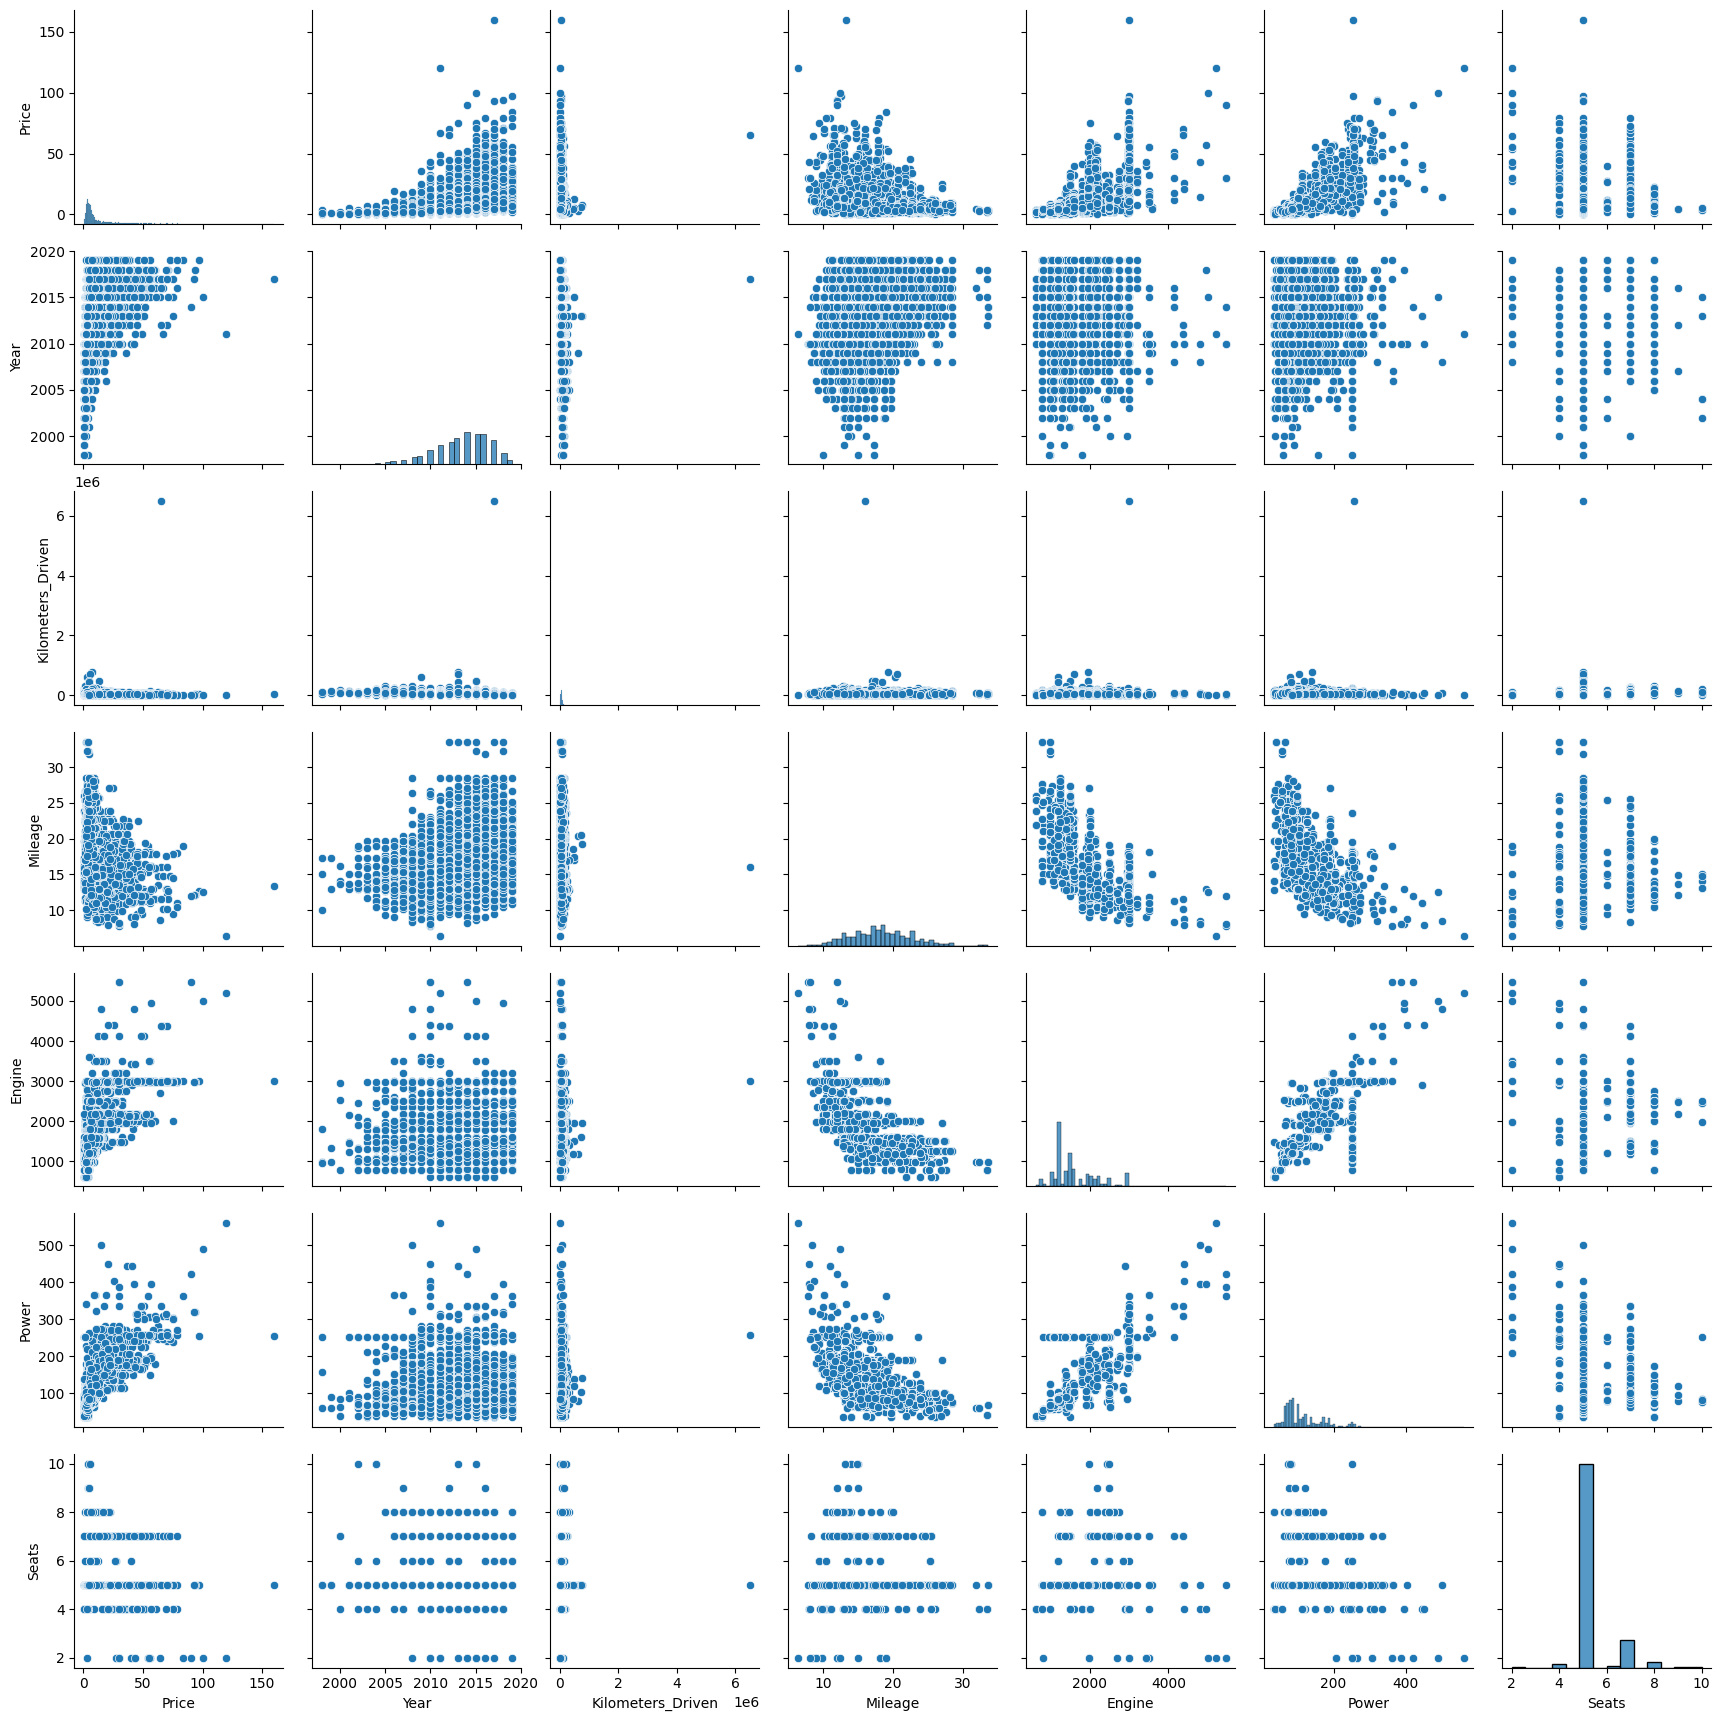

In [19]:
sns.pairplot(data[['Price', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']])
plt.show()

# 6. Box Plot for Outlier Detection


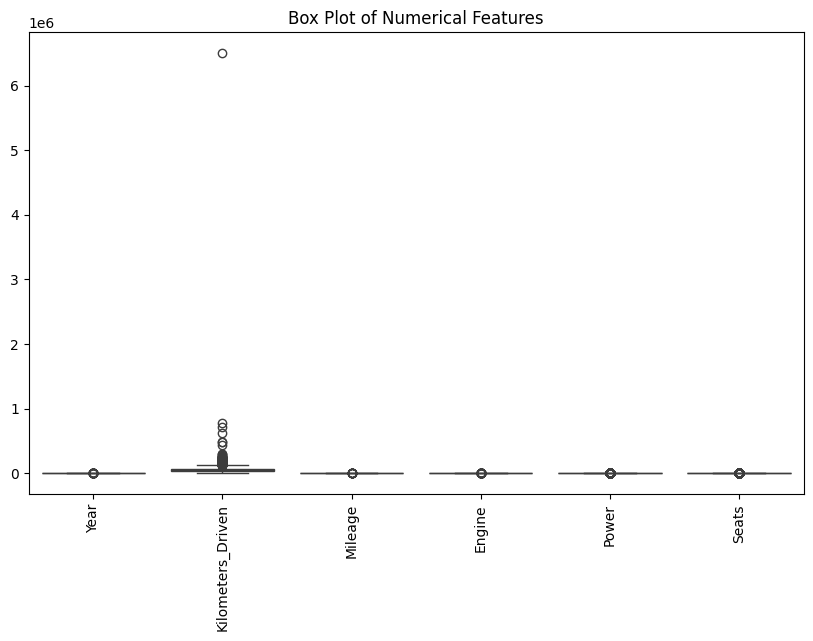

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']])
plt.xticks(rotation=90)
plt.title('Box Plot of Numerical Features')
plt.show()

# 7. Count Plots for Categorical Features (Fuel_Type, Transmission, Owner_Type)


In [21]:
plt.figure(figsize=(15, 5))


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>


# Plot for Fuel_Type,Transmission,Owner_type

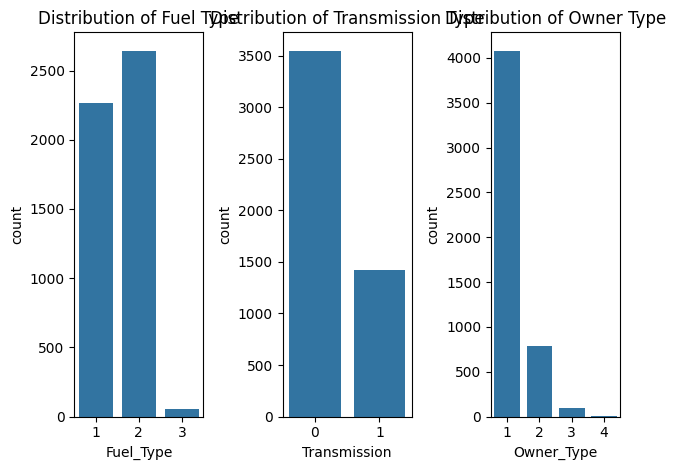

In [23]:
# Plot for Fuel_Type
plt.subplot(1, 3, 1)
sns.countplot(x='Fuel_Type', data=data)
plt.title('Distribution of Fuel Type')

  # Plot for Transmission
plt.subplot(1, 3, 2)
sns.countplot(x='Transmission', data=data)
plt.title('Distribution of Transmission Type')

# Plot for Owner_Type
plt.subplot(1, 3, 3)
sns.countplot(x='Owner_Type', data=data)
plt.title('Distribution of Owner Type')

plt.tight_layout()
plt.show()



